# Installing / Importing Libraries

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime, date 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [38]:
matplotlib.rcParams['figure.figsize'] = (10,5)

In [39]:
path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data'
df_Day_Stationary_data = pd.read_csv(path+'/Day_Stationary_data.csv', sep=',', header=0, parse_dates=True)
df_Day_Stationary_data

,date,Inquiries
0,2017-01-01,NaN
1,2017-01-02,NaN
2,2017-01-03,NaN
3,2017-01-04,1.320733
4,2017-01-05,1.247026
...,...,...
2095,2022-09-27,1.178299
2096,2022-09-28,1.298347
2097,2022-09-29,NaN
2098,2022-09-30,NaN


## Changing the datatypes 

In [40]:
df_Day_Stationary_data['date'] = pd.to_datetime(df_Day_Stationary_data['date'])

In [41]:
df_Day_Stationary_data.isnull().sum()

date         0
Inquiries    6
dtype: int64

In [42]:
df_Day_Stationary_data = df_Day_Stationary_data.set_index('date')

# Simply Moving Average

Simply Moving Average = (t+(t-1)+(t-2)+....+(t-n))/n

n is the number of period (window) which we want to average

In [43]:
df_Day_Stationary_data['SMA'] = df_Day_Stationary_data['Inquiries'].rolling(window=3).mean()

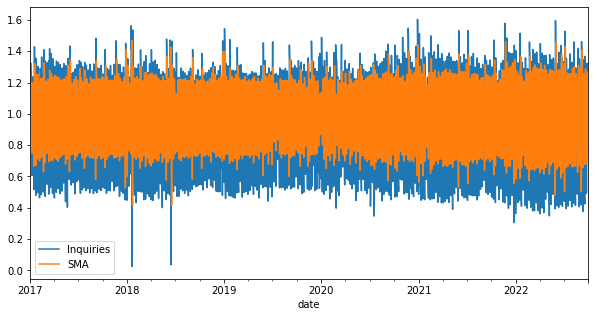

In [44]:
df_Day_Stationary_data.plot()
plt.show()

# Weighted Moving Average
Weighted Moving Average = (t * weighting factor) + ((t-1) * weighting factor-1) + ((t-n) * weighting factor-n)/n

In [45]:
def wma(weights):
    def calc(x):
        return (weights * x).mean()
    return calc

In [46]:
df_Day_Stationary_data['WMA'] = df_Day_Stationary_data['Inquiries'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

In [47]:
df_Day_Stationary_data

,Inquiries,SMA,WMA
date,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,1.320733,NaN,NaN
2017-01-05,1.247026,NaN,NaN
...,...,...,...
2022-09-27,1.178299,1.003065,1.114765
2022-09-28,1.298347,1.266481,1.262406
2022-09-29,NaN,NaN,NaN


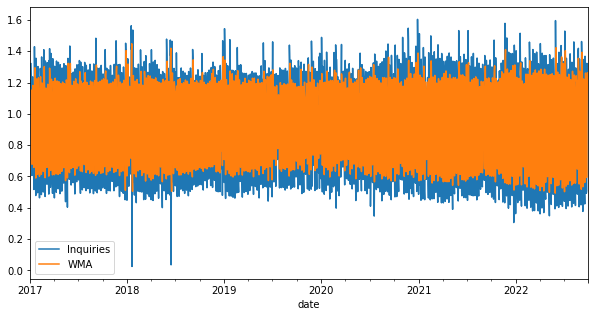

In [48]:
df_Day_Stationary_data.drop(columns=['SMA']).plot()
plt.show()

# Exponential Moving Average
Exponential Moving Average = (Close - Previous EMA) * (2/(Span+1)) + Previous EMA

Span is duration for which we want to calculate EMA

In [49]:
df_Day_Stationary_data['EWM'] = df_Day_Stationary_data['Inquiries'].ewm(adjust=False, span=3, min_periods=0).mean()

In [50]:
df_Day_Stationary_data

,Inquiries,SMA,WMA,EWM
date,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,1.320733,NaN,NaN,1.320733
2017-01-05,1.247026,NaN,NaN,1.283880
...,...,...,...,...
2022-09-27,1.178299,1.003065,1.114765,1.083347
2022-09-28,1.298347,1.266481,1.262406,1.190847
2022-09-29,NaN,NaN,NaN,1.190847


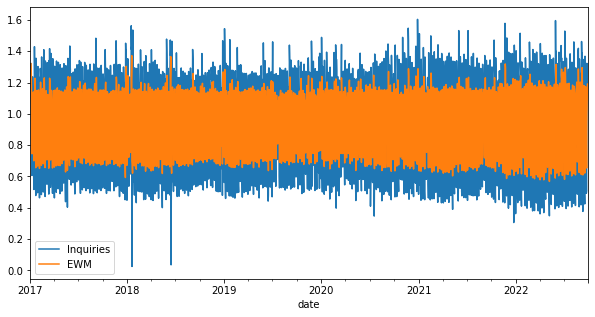

In [51]:
df_Day_Stationary_data.drop(columns=['SMA','WMA']).plot()
plt.show()

# Exponential Smoothing
α = smoothing factor of data; 0(weightage to historical data) < α < 1(weightage to most recent data)

In [52]:
df_Day_Stationary_data['EWM_s0.7'] = df_Day_Stationary_data['Inquiries'].ewm(adjust=False, alpha=0.7, min_periods=0).mean()
df_Day_Stationary_data['EWM_s0.7_shift'] = df_Day_Stationary_data['Inquiries'].ewm(adjust=False, alpha=0.7, min_periods=0).mean().shift(1)
df_Day_Stationary_data['EWM_s0.3'] = df_Day_Stationary_data['Inquiries'].ewm(adjust=False, alpha=0.3, min_periods=0).mean()

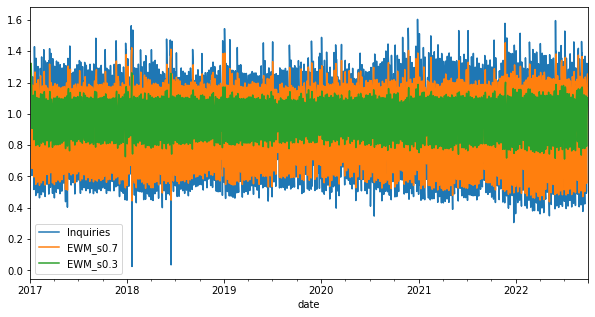

In [53]:
df_Day_Stationary_data[['Inquiries','EWM_s0.7','EWM_s0.3']].plot()
plt.show()

# RMSE

In [54]:
df_Day_Stationary_data

,Inquiries,SMA,WMA,EWM,EWM_s0.7,EWM_s0.7_shift,EWM_s0.3
date,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,1.320733,NaN,NaN,1.320733,1.320733,NaN,1.320733
2017-01-05,1.247026,NaN,NaN,1.283880,1.269138,1.320733,1.298621
...,...,...,...,...,...,...,...
2022-09-27,1.178299,1.003065,1.114765,1.083347,1.152729,1.093066,1.019903
2022-09-28,1.298347,1.266481,1.262406,1.190847,1.254662,1.152729,1.103436
2022-09-29,NaN,NaN,NaN,1.190847,1.254662,1.254662,1.103436


In [55]:
((df_Day_Stationary_data['Inquiries']-df_Day_Stationary_data['SMA'])**2).mean()**0.5

0.28204202750918606

In [56]:
((df_Day_Stationary_data['Inquiries']-df_Day_Stationary_data['WMA'])**2).mean()**0.5

0.20017052695434484

In [57]:
((df_Day_Stationary_data['Inquiries']-df_Day_Stationary_data['EWM'])**2).mean()**0.5

0.18895533884145152

In [58]:
#rms = mean_squared_error(df_Day_Stationary_data['Inquiries'], df_Day_Stationary_data['EWM_s0.7'], squared=False)
((df_Day_Stationary_data['Inquiries']-df_Day_Stationary_data['EWM_s0.7'])**2).mean()**0.5

0.11453675409445412

In [59]:
((df_Day_Stationary_data['Inquiries']-df_Day_Stationary_data['EWM_s0.3'])**2).mean()**0.5

0.2552128942443683

## Exponential Smoothing with alpha 0.7 giving the best RMSE

<AxesSubplot:xlabel='date'>

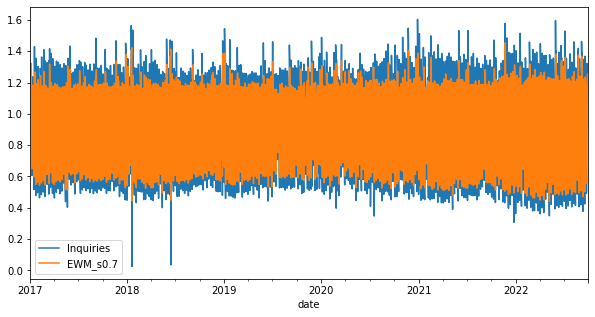

In [60]:
df_Day_Stationary_data[['Inquiries','EWM_s0.7']].plot()